In [15]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import pickle
import os

/home/el10/Downloads/yes/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/el10/Downloads/yes/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/el10/Downloads/yes/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/el10/Downloads/yes/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/el10/Downloads/yes/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/el10/Downloads/yes/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 478

In [182]:
model_name = "mlp"
# dtree,linear_regression,ridge,ridge_poly2,mlp,

In [183]:
with open(model_name + '_predictions.pkl', 'rb') as f:
    predictions = pickle.load(f)

In [184]:
for n in range(1, 7):    
    predictions['error_t+'+str(n)] = predictions['pred_t+'+str(n)] - predictions['demand']
    predictions['abs_error_t+'+str(n)] = abs(predictions['error_t+'+str(n)])
    predictions['abs_pct_error_t+'+str(n)] = abs(predictions['error_t+'+str(n)]) / predictions['demand']

In [185]:
min_date = '2014-01-01'
max_date = '2014-01-10'

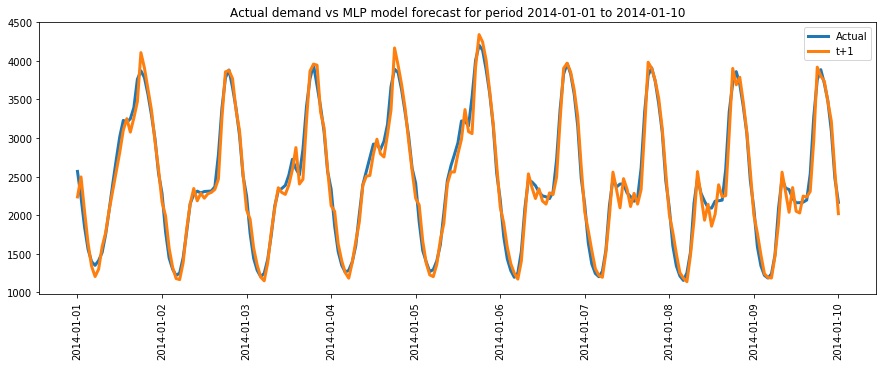

In [186]:
plot_df = predictions.loc[(predictions['timeStamp']>=min_date) & (predictions['timeStamp']<=max_date), ]
plt.figure(figsize=(15, 5))
plt.plot(plot_df['timeStamp'], plot_df['demand'], linewidth=3, label='Actual')
for n in [1]: #[1,3,5]:
    plt.plot(plot_df['timeStamp'], plot_df['pred_t+'+str(n)], linewidth=3/n, label='t+'+str(n))
plt.xticks(rotation=90)
plt.title('Actual demand vs ' + model_name.upper() + ' model forecast for period ' + min_date + ' to ' + max_date)
plt.legend()
plt.show()

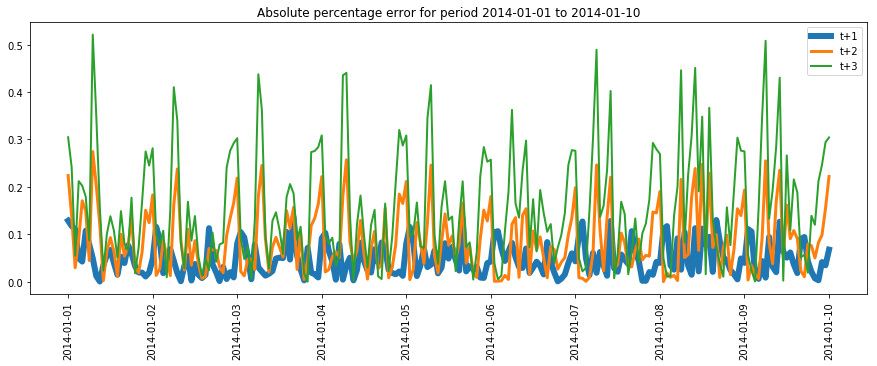

In [187]:
plt.figure(figsize=(15, 5))
for n in range(1,4,1):
    plt.plot(plot_df['timeStamp'], plot_df['abs_pct_error_t+'+str(n)], linewidth=6/n, label='t+'+str(n))
plt.xticks(rotation=90)
plt.title('Absolute percentage error for period ' + min_date + ' to ' + max_date)
plt.legend()
plt.show()

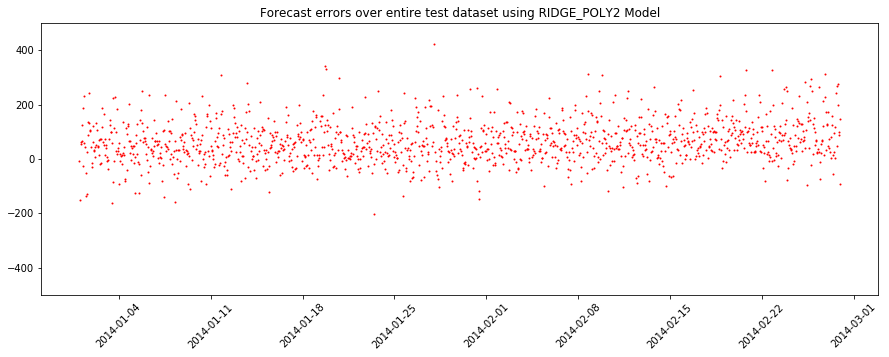

In [181]:
plt.figure(figsize=(15, 5))
plt.plot(predictions['timeStamp'], predictions['error_t+1'], 'ro', markersize=1)
plt.title('Forecast errors over entire test dataset using ' + model_name.upper() + ' Model')
plt.xticks(rotation=45)
plt.ylim( -500, 500 )
plt.show()

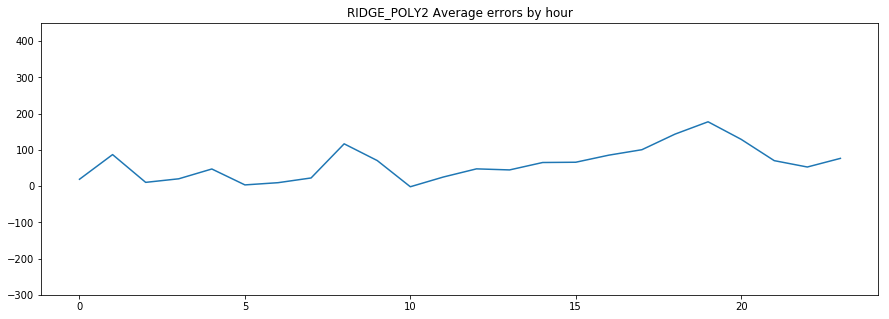

In [153]:
plt.figure(figsize=(15, 5))
plt.plot(predictions[['hour', 'error_t+1']].groupby('hour').mean())
plt.title(model_name.upper() + ' Average errors by hour')
plt.ylim( -300, 450 )
plt.show()

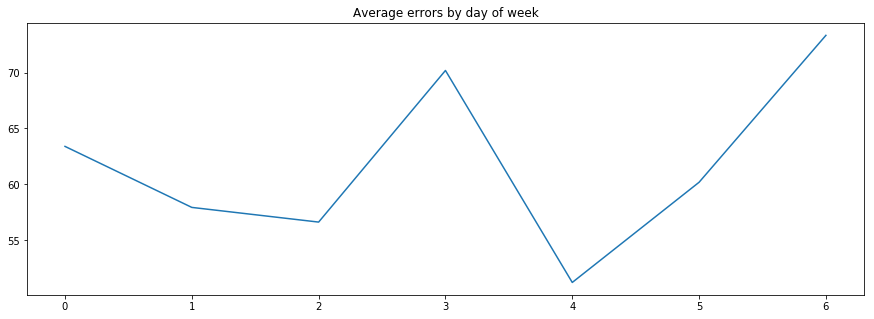

In [154]:
plt.figure(figsize=(15, 5))
plt.plot(predictions[['dayofweek', 'error_t+1']].groupby('dayofweek').mean())
plt.title('Average errors by day of week')
plt.show()

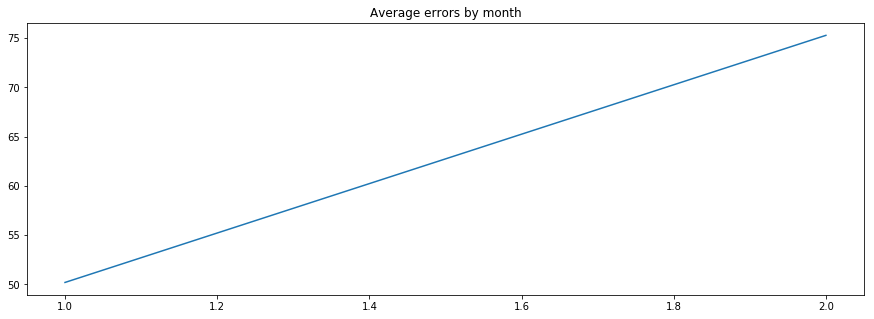

In [155]:
plt.figure(figsize=(15, 5))
plt.plot(predictions[['month', 'error_t+1']].groupby('month').mean())
plt.title('Average errors by month')
plt.show()